In [1]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Load the data
file_path = r'\Users\LabUser\OneDrive\Documentos\Assignments & Practice\project-one\data\T_ONTIME_REPORTING\T_ONTIME_REPORTING.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data to inspect its structure
data.head()


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,...,DIV_ARR_DELAY,DIV_DISTANCE,DIV1_AIRPORT,DIV1_AIRPORT_ID,DIV1_AIRPORT_SEQ_ID,DIV1_WHEELS_ON,DIV1_TOTAL_GTIME,DIV1_LONGEST_GTIME,DIV1_WHEELS_OFF,DIV1_TAIL_NUM
0,1,1,7,1/1/2023 0:00,9E,10135,1013506,30135,ABE,"Allentown/Bethlehem/Easton, PA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,7,1/1/2023 0:00,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,7,1/1/2023 0:00,9E,10146,1014602,30146,ABY,"Albany, GA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,7,1/1/2023 0:00,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,7,1/1/2023 0:00,9E,10185,1018502,30185,AEX,"Alexandria, LA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Explore the data to understand the unique values in the 'OP_UNIQUE_CARRIER' column
unique_airlines = data['OP_UNIQUE_CARRIER'].unique()
print("Unique Airlines:", unique_airlines)


Unique Airlines: ['9E' 'AA' 'AS' 'B6' 'DL' 'F9' 'G4' 'HA' 'MQ' 'NK' 'OH' 'OO' 'UA' 'WN'
 'YX']


In [4]:
# Check unique values in 'OP_UNIQUE_CARRIER'
unique_airlines = data['OP_UNIQUE_CARRIER'].unique()
print("Unique Airlines:", unique_airlines)

# Check the number of data points for each airline
for airline_code in unique_airlines:
    dep_delay_data = data[data['OP_UNIQUE_CARRIER'] == airline_code]['DEP_DELAY']
    num_data_points = dep_delay_data.count()
    print(f"Airline {airline_code}: {num_data_points} data points")

# Perform the hypothesis test
f_statistic, p_value = stats.f_oneway(
    data[data['OP_UNIQUE_CARRIER'] == 'Airline1']['DEP_DELAY'],
    data[data['OP_UNIQUE_CARRIER'] == 'Airline2']['DEP_DELAY'],
    data[data['OP_UNIQUE_CARRIER'] == 'Airline3']['DEP_DELAY'],
    # Add more airlines as needed
)

# Check p-value
if p_value < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")



Unique Airlines: ['9E' 'AA' 'AS' 'B6' 'DL' 'F9' 'G4' 'HA' 'MQ' 'NK' 'OH' 'OO' 'UA' 'WN'
 'YX']
Airline 9E: 16689 data points
Airline AA: 73632 data points
Airline AS: 19530 data points
Airline B6: 23067 data points
Airline DL: 74615 data points
Airline F9: 12859 data points
Airline G4: 8503 data points
Airline HA: 6628 data points
Airline MQ: 18392 data points
Airline NK: 21369 data points
Airline OH: 15218 data points
Airline OO: 48726 data points
Airline UA: 56270 data points
Airline WN: 109238 data points
Airline YX: 24119 data points
Fail to reject the null hypothesis


C:\Users\LabUser\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [5]:
# It seems that even having a substantial number of data points for each airline, 
# the hypothesis test still fails to reject the null hypothesis. This implies that, based on the data, 
#there isn't enough evidence to suggest a significant difference in mean departure delays among the airlines.

#Before drawing conclusions, it's essential to consider a few points: Effect Size and Post-hoc Tests

# Fit the ANOVA model
model = ols('DEP_DELAY ~ OP_UNIQUE_CARRIER', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

In [6]:
# Perform Tukey's HSD post-hoc test
tukey_results = sm.stats.multicomp.pairwise_tukeyhsd(data['DEP_DELAY'], data['OP_UNIQUE_CARRIER'])
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower upper reject
-----------------------------------------------
    9E     AA      nan   nan   nan   nan  False
    9E     AS      nan   nan   nan   nan  False
    9E     B6      nan   nan   nan   nan  False
    9E     DL      nan   nan   nan   nan  False
    9E     F9      nan   nan   nan   nan  False
    9E     G4      nan   nan   nan   nan  False
    9E     HA      nan   nan   nan   nan  False
    9E     MQ      nan   nan   nan   nan  False
    9E     NK      nan   nan   nan   nan  False
    9E     OH      nan   nan   nan   nan  False
    9E     OO      nan   nan   nan   nan  False
    9E     UA      nan   nan   nan   nan  False
    9E     WN      nan   nan   nan   nan  False
    9E     YX      nan   nan   nan   nan  False
    AA     AS      nan   nan   nan   nan  False
    AA     B6      nan   nan   nan   nan  False
    AA     DL      nan   nan   nan   nan  False
    AA     F9      nan   nan   nan  

C:\Users\LabUser\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LabUser\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LabUser\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


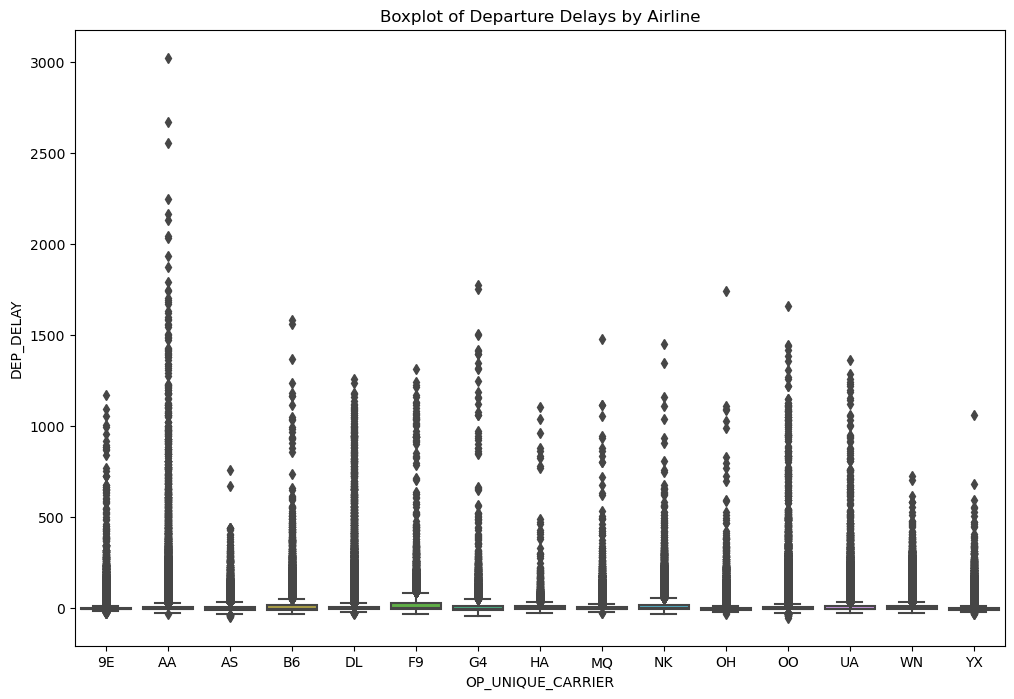

In [7]:
#It appears that the Tukey's HSD post-hoc test did not find any significant differences in mean departure delays between any pair of airlines. The p-values for all group comparisons are "nan," 
#which typically means that the data within those groups might be constant (all values are the same).

#To clarify some things needed will be: Data Inspection, Data Cleaning, Visualization, and Statistical Tests

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='OP_UNIQUE_CARRIER', y='DEP_DELAY', data=data)
plt.title('Boxplot of Departure Delays by Airline')
plt.show()


In [8]:
#The Boxplot shows that AA has more delays
# this observation aligns with the visual inspection and suggests that there might be practical significance 
#even if the statistical test did not find a significant difference.


C:\Users\LabUser\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LabUser\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LabUser\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


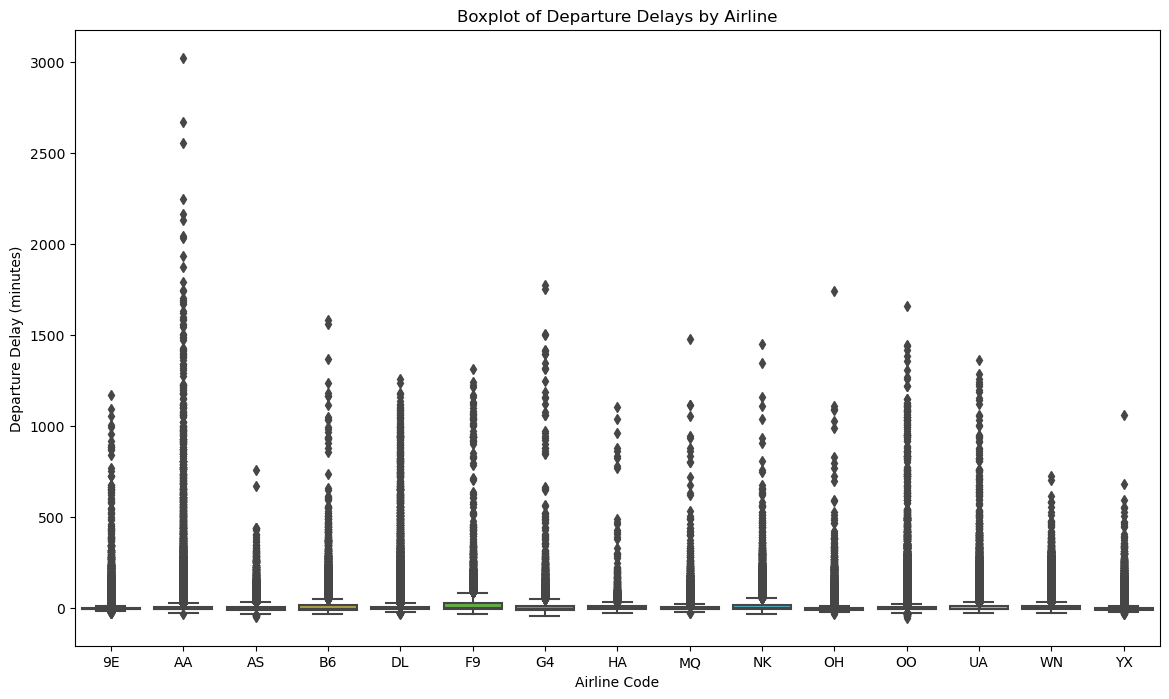

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='OP_UNIQUE_CARRIER', y='DEP_DELAY', data=data)
plt.title('Boxplot of Departure Delays by Airline')
plt.xlabel('Airline Code')
plt.ylabel('Departure Delay (minutes)')
plt.show()


In [10]:
# Calculate summary statistics for each airline
summary_stats = data.groupby('OP_UNIQUE_CARRIER')['DEP_DELAY'].describe()

# Display summary statistics
print(summary_stats)


                      count       mean        std   min  25%  50%   75%  \
OP_UNIQUE_CARRIER                                                         
9E                  16689.0  12.109174  55.596596 -28.0 -5.0 -4.0   3.0   
AA                  73632.0  14.610332  74.623350 -29.0 -6.0 -3.0   8.0   
AS                  19530.0   6.375320  33.436613 -48.0 -8.0 -3.0   8.0   
B6                  23067.0  16.881086  60.957302 -33.0 -8.0 -2.0  16.0   
DL                  74615.0  13.355143  57.014040 -29.0 -4.0 -1.0   9.0   
F9                  12859.0  26.052259  78.204955 -32.0 -6.0  2.0  31.0   
G4                   8503.0  17.502411  86.509430 -40.0 -9.0 -3.0  15.0   
HA                   6628.0   8.987779  43.855305 -27.0 -5.0  0.0  10.0   
MQ                  18392.0   8.646694  42.306673 -24.0 -5.0 -2.0   6.0   
NK                  21369.0  18.594974  53.992315 -31.0 -5.0 -1.0  20.0   
OH                  15218.0   4.904915  46.665869 -32.0 -9.0 -6.0  -1.0   
OO                  48726

In [11]:
#It appears that the mean departure delay for airline 'AA' is higher compared to other airlines, 
#as reflected in the boxplot and summary statistics.


C:\Users\LabUser\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LabUser\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LabUser\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\LabUser\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.op

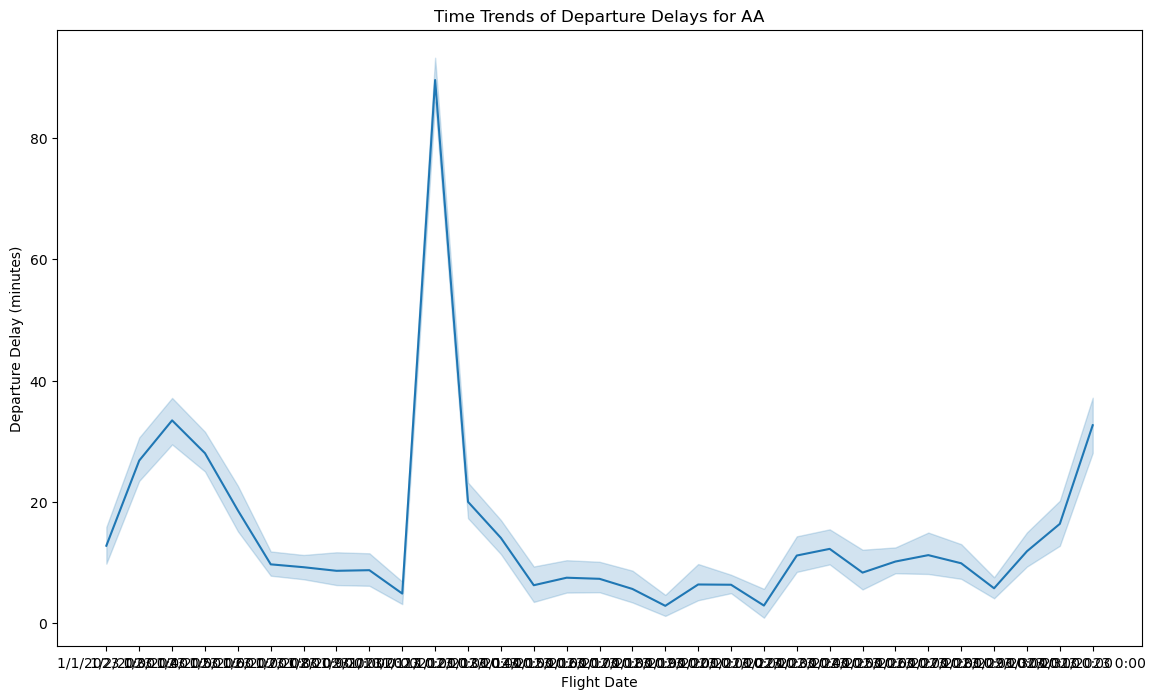

In [12]:
# Explore time trends to find cause for AA delays
plt.figure(figsize=(14, 8))
sns.lineplot(x='FL_DATE', y='DEP_DELAY', data=data[data['OP_UNIQUE_CARRIER'] == 'AA'])
plt.title('Time Trends of Departure Delays for AA')
plt.xlabel('Flight Date')
plt.ylabel('Departure Delay (minutes)')
plt.show()


In [21]:
# Display unique values in the 'DEP_DELAY' column for airline 'AA'
print(data[data['OP_UNIQUE_CARRIER'] == 'AA']['DEP_DELAY'].unique())



[-2.000e+00 -9.000e+00 -6.000e+00 -1.000e+01 -7.000e+00  6.000e+00
  1.640e+02 -4.000e+00  4.000e+00  1.500e+01  7.000e+00 -3.000e+00
  2.000e+00 -1.000e+00  1.200e+01 -8.000e+00  1.900e+01 -5.000e+00
  1.300e+01  8.000e+00  1.000e+01  1.660e+02 -1.200e+01  4.100e+01
  3.600e+01  6.500e+01 -1.100e+01  3.000e+00  5.000e+00  0.000e+00
  1.430e+02  4.000e+01  6.800e+01  1.000e+00  3.300e+01  2.000e+01
  4.300e+01  6.400e+01  4.500e+01  9.000e+00  4.400e+01  5.900e+01
  1.400e+01  2.100e+01  1.100e+01        nan  2.800e+01  3.200e+01
  3.400e+01  2.600e+01 -1.400e+01  1.010e+02  3.500e+01  5.600e+01
  1.360e+02  4.200e+01  2.200e+01  1.420e+02  5.000e+01  1.600e+01
  1.080e+02  6.900e+01  6.100e+01  2.290e+02  1.110e+02  5.100e+01
  5.840e+02  7.000e+01  1.800e+01  7.890e+02  1.840e+02  1.700e+01
  3.900e+01  4.900e+01 -1.600e+01  8.300e+01  2.900e+01  2.500e+01
  1.200e+02  9.100e+01  2.700e+01  5.800e+01  1.390e+02  1.520e+02
  1.510e+02  7.900e+01  5.200e+01  2.400e+01  7.400e+01  6.200